In [1]:
'''
Editor:hyunhomo

Create own time series dataset of temperature with random number generator
Data period is assumed as two years from Jan 2018 to Jan 2020, and the number of instances in the dataset should 
be around 1 million with assuming the data collected in every minute (or sampling rate of 1 minute)
'''
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle


### Create pandas DataFrame 

## Function to derive current time with the format of pandas timestamp '%Y-%m-%d %H:%M:00' 
def current_time():
    ct = datetime.now()
    ct_minute = ct.strftime('%Y-%m-%d %H:%M:00')
#     ct_ts = pd.to_datetime(ct_minute)
    ct_ts = pd.Timestamp(ct_minute, freq='t')
    return ct_ts

## Generate a fixed frequency DatetimeIndex
print ('Generating DatetimeIndex...')
date_idx = pd.date_range(start='1/31/2018', end='3/31/2020', freq='min')
print ('DatetimeIndex generated')
print ("date_idx", date_idx)
print ("type(date_idx)",type(date_idx))
print ("len(date_idx)",len(date_idx))

# Set current time(minute) as the threshold for training/test dataset split 
current_minute = current_time()
threshold_dates = [[date_idx[0],current_minute ],
                   [current_minute, date_idx[-1]]]

for last_train_date, first_test_date in threshold_dates:
    print (last_train_date)
    print(first_test_date)


print ("current_minute", current_minute)
print ("Total number of instances", len(date_idx))
print ("The number of training instances", np.where(date_idx==current_minute)[0][0]+1)
print ("The number of test instances", len(date_idx) - (np.where(date_idx==current_minute)[0][0]+1) )





Generating DatetimeIndex...
DatetimeIndex generated
date_idx DatetimeIndex(['2018-01-31 00:00:00', '2018-01-31 00:01:00',
               '2018-01-31 00:02:00', '2018-01-31 00:03:00',
               '2018-01-31 00:04:00', '2018-01-31 00:05:00',
               '2018-01-31 00:06:00', '2018-01-31 00:07:00',
               '2018-01-31 00:08:00', '2018-01-31 00:09:00',
               ...
               '2020-03-30 23:51:00', '2020-03-30 23:52:00',
               '2020-03-30 23:53:00', '2020-03-30 23:54:00',
               '2020-03-30 23:55:00', '2020-03-30 23:56:00',
               '2020-03-30 23:57:00', '2020-03-30 23:58:00',
               '2020-03-30 23:59:00', '2020-03-31 00:00:00'],
              dtype='datetime64[ns]', length=1137601, freq='T')
type(date_idx) <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
len(date_idx) 1137601
2018-01-31 00:00:00
2020-02-04 11:27:00
2020-02-04 11:27:00
2020-03-31 00:00:00
current_minute 2020-02-04 11:27:00
Total number of instances 1137601
The n

df_Temp                        date
0       2018-01-31 00:00:00
1       2018-01-31 00:01:00
2       2018-01-31 00:02:00
3       2018-01-31 00:03:00
4       2018-01-31 00:04:00
...                     ...
1137596 2020-03-30 23:56:00
1137597 2020-03-30 23:57:00
1137598 2020-03-30 23:58:00
1137599 2020-03-30 23:59:00
1137600 2020-03-31 00:00:00

[1137601 rows x 1 columns]
[19.61979093 18.80294389 19.85718399 ... 19.82761896 20.13678604
 20.13003644]
1
113760.1
2
11376.01
3
1137.601
4
113.7601
max 25.255103841988856
min 14.806838331764217
mean 19.997621328302404
std 0.8607618374469321
The number of abnormal(cold) 2425
The number of abnormal(hot) 2324


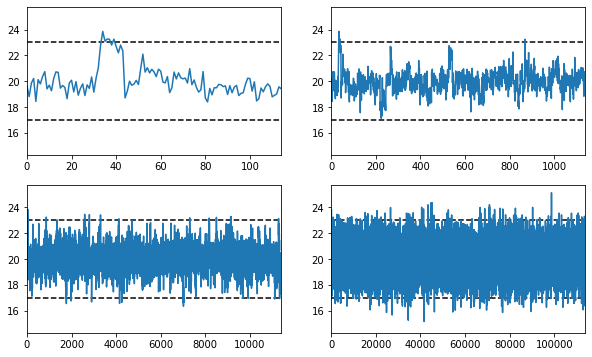

In [2]:
'''
def generate_pattern_data(length=100, avg_pattern_length=5, avg_amplitude=1,
                          default_variance=1, variance_pattern_length=10, variance_amplitude=2,
                          generators=std_generators, include_negatives=True):
'''
from synth_ts_data import generate_bell
from synth_ts_data import generate_funnel
from synth_ts_data import generate_cylinder

from synth_ts_data import generate_pattern_data



## Create DataFrame and assign DatetimeIndex

df_Temp = pd.DataFrame(date_idx, columns=['date'])
print ("df_Temp", df_Temp)

num_instance = len(date_idx)
std_generators = [generate_bell, generate_funnel, generate_cylinder]
Temp_data = generate_pattern_data(length=num_instance, avg_pattern_length=5, avg_amplitude=0.5, generators=std_generators, 
                          default_variance=0.5, variance_pattern_length=10, variance_amplitude=1, include_negatives=True)

#add offset
Temp_data = Temp_data+20

print (Temp_data)

plt.figure(figsize=(10,6))

for i in range(1, 5):
    print (i)
    
    ax = plt.subplot(2, 2, 5-i)
    xmax = num_instance / (10**i)
    print (xmax)
    ax.set_xlim([0,xmax])
    ax.plot(Temp_data)

    plt.hlines(23, xmin = 0, xmax = xmax, linestyles='dashed', )
    plt.hlines(17, xmin = 0, xmax = xmax, linestyles='dashed', )

    
    

# plt.plot(x=[0,10], Temp_data)
# plt.hlines(23, xmin = 0, xmax = num_instance, linestyles='dashed', )
# plt.hlines(17, xmin = 0, xmax = num_instance, linestyles='dashed', )

print("max", max(Temp_data))
print("min", min(Temp_data))
print("mean", np.mean(Temp_data))
print("std",np.std(Temp_data))
print ("The number of abnormal(cold)", np.sum(Temp_data < 17))
print ("The number of abnormal(hot)", np.sum(Temp_data > 23))

In [3]:
##  Assign temperature values into DataFrame with the column name 'temperature'
df_Temp['temperature'] = Temp_data
print (df_Temp)


# Generate label indicator and assign it
# Indicator = np.zeros (len(Temp_data) , dtype = object)

# Indicator[((Temp_data>=18) & (Temp_data<=22)) ] = 'normal'
# print ("Indicator", Indicator)
# Indicator[Temp_data<18] = 'abnormal(cold)'
# Indicator[Temp_data>22] ='abnormal(hot)'

# print ("Indicator", Indicator)
# print (np.sum([Indicator == 'normal']))
# print (np.sum([Indicator == 'abnormal(cold)']))
# print (np.sum([Indicator == 'abnormal(hot)']))
# df_Temp['indicator'] = Indicator


df_Temp.to_csv('ts_temperature.csv', index=False)
print ("csv file saved")

                       date  temperature
0       2018-01-31 00:00:00    19.619791
1       2018-01-31 00:01:00    18.802944
2       2018-01-31 00:02:00    19.857184
3       2018-01-31 00:03:00    20.208154
4       2018-01-31 00:04:00    18.432066
...                     ...          ...
1137596 2020-03-30 23:56:00    19.419647
1137597 2020-03-30 23:57:00    19.381692
1137598 2020-03-30 23:58:00    19.827619
1137599 2020-03-30 23:59:00    20.136786
1137600 2020-03-31 00:00:00    20.130036

[1137601 rows x 2 columns]
csv file saved
